# K Means Clustering with Python

[K Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering) is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In K Means Clustering, we have to specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Creating some Data

Using sklearn to randomly generate some artifical data.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Generate artifical data
data = make_blobs(
    n_samples=200,
    n_features=2,
    centers=4, # The number of centers to generate, or the fixed center locations.
    cluster_std=1.8, # The standard deviation of the clusters
    random_state=101
)
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [4]:
# Assign data features and targets to different variables
data_feature = data[0]
data_target = data[1]
print(data_feature.shape)
print(data_target.shape)

(200, 2)
(200,)


## Visualizing Data

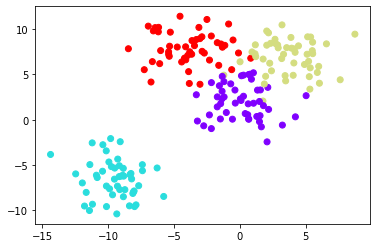

In [5]:
# Create a scatter plot visualizing the data generated
plt.scatter(
    data_feature[:, 0], # x = first column
    data_feature[:, 1], # y = second column
    c=data_target, # c = sequence of n numbers to be mapped to colors
    cmap='rainbow'
)

## Creating K-Means Clusters

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Create a KMeans instance
kmeans = KMeans(n_clusters=4)

In [8]:
# Fit the feature data to the newly created KMeans instance
# Notice that KMeans is an unsupervised learning model,
# so we do not pass in the fit() method the target values.
# KMeans will automatically assign a cluster number to each
# data point.
kmeans.fit(data_feature)

KMeans(n_clusters=4)

In [9]:
# Check cluster centers returned by the kmeans model
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [10]:
# Check target cluster labels that the kmeans model assigned
# to each data point
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

Text(0.5, 1.0, 'Original Clusters of Data')

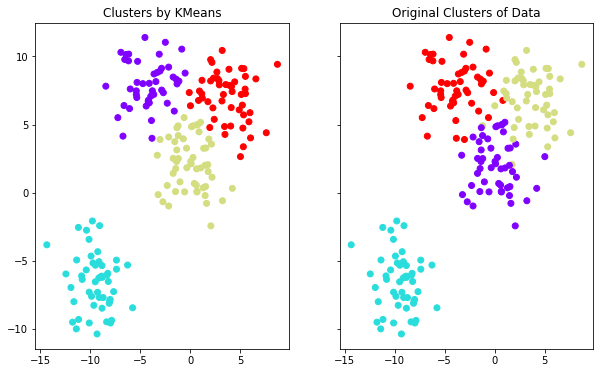

In [11]:
# Visualize clusters returned by kmeans model and compare it
# to the original clusters when the data was artifically generated
figure, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    sharey=True,
    figsize=(10, 6)
)

# Plot a scatter chart for the clusters that the kmeans model returned
ax1.scatter(
    data_feature[:, 0], # x = first column
    data_feature[:, 1], # y = second column
    c=kmeans.labels_, # c = sequence of n numbers to be mapped to colors
    cmap='rainbow'
)
ax1.set_title('Clusters by KMeans')

# Plot a scatter chart for the clusters that the kmeans model returned
ax2.scatter(
    data_feature[:, 0], # x = first column
    data_feature[:, 1], # y = second column
    c=data_target, # c = sequence of n numbers to be mapped to colors
    cmap='rainbow'
)
ax2.set_title('Original Clusters of Data')

<font color=magenta>Note that the colors used in the above two scatter plots are different for coressponding clusters as the cluster labels (numbers 0, 1, 2, 3) were arbitrarily decided by the `KMeans` algorithm itself - as KMeans is an `unsupervised learning` algorithm. The cluster labels (and therefore the colors) might be different from the original cluster lables of the data, but there should be exactly 4 clusters with data points being clustered quite similar to the original ones.</font>